Варианты графиков: 

In [1]:
#импорт библиотек
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import pickle

In [2]:
train_df = pd.read_csv('alice_data/train_sessions.csv',
                      index_col='session_id')
test_df = pd.read_csv('alice_data/test_sessions.csv',
                     index_col='session_id')

In [3]:
# Меняем тип атрибутов time_i на datetime 
times = ['time%s' % i for i in range(1, 11)]

train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime)

In [4]:
# Меняем тип атрибутов site_i на целочисленный и заменяем отсутствующие значения нулями
sites = ['site%s' % i for i in range(1,11)]

train_df[sites] = train_df[sites].fillna(0).astype(int)
test_df[sites] = test_df[sites].fillna(0).astype(int)

In [5]:
# Добавляем колонку месяца

train_df["month"] = train_df["time1"].dt.month

# Группируем по таргету и месяцу

train_df.groupby(['target',"month"]).count()

site1  time1  site2  time2  site3  time3  site4  time4  site5  \
target month                                                                  
0      1      36103  36103  36103  35738  36103  35377  36103  35056  36103   
       2      59021  59021  59021  58401  59021  57752  59021  57210  59021   
       3      59187  59187  59187  58552  59187  57968  59187  57453  59187   
       4      34861  34861  34861  33982  34861  33320  34861  32887  34861   
       5       3229   3229   3229   3186   3229   3156   3229   3135   3229   
       6       2094   2094   2094   2064   2094   2042   2094   2018   2094   
       7        139    139    139    134    139    132    139    117    139   
       8        290    290    290    285    290    280    290    263    290   
       9       3087   3087   3087   3055   3087   3026   3087   2976   3087   
       10      2788   2788   2788   2755   2788   2725   2788   2692   2788   
       11     34047  34047  34047  33480  34047  32931  34047  32514  34047   
       12     16418  16418  16418  16172  16418  15923  16418  15714  16418   
1      1        129    129    129    128    129    127    129    127    129   
       2        471    471    471    470    471    469    471    469    471   
       3        400    400    400    399    400    396    400    396    400   
       4        340    340    340    340    340    339    340    338    340   
       9        377    377    377    377    377    376    377    376    377   
       11       446    446    446    446    446    446    446    446    446   
       12       134    134    134    134    134    134    134    134    134   

              time5  site6  time6  site7  time7  site8  time8  site9  time9  \
target month                                                                  
0      1      34729  36103  34449  36103  34137  36103  33849  36103  33551   
       2      56721  59021  56225  59021  55755  59021  55300  59021  54847   
       3      56930  59187  56477  59187  56004  59187  55568  59187  55124   
       4      32463  34861  32089  34861  31754  34861  31449  34861  31142   
       5       3102   3229   3081   3229   3061   3229   3036   3229   3013   
       6       1999   2094   1973   2094   1956   2094   1939   2094   1919   
       7        112    139    108    139     98    139     94    139     92   
       8        260    290    247    290    242    290    240    290    237   
       9       2953   3087   2927   3087   2899   3087   2880   3087   2855   
       10      2668   2788   2647   2788   2630   2788   2611   2788   2592   
       11     32101  34047  31691  34047  31351  34047  31016  34047  30665   
       12     15511  16418  15308  16418  15141  16418  14979  16418  14785   
1      1        127    129    125    129    123    129    123    129    123   
       2        465    471    463    471    463    471    462    471    462   
       3        396    400    395    400    395    400    395    400    395   
       4        337    340    337    340    337    340    334    340    334   
       9        376    377    376    377    376    377    376    377    376   
       11       446    446    444    446    443    446    441    446    441   
       12       133    134    133    134    132    134    132    134    131   

              site10  time10  
target month                  
0      1       36103   33308  
       2       59021   54419  
       3       59187   54701  
       4       34861   30839  
       5        3229    2985  
       6        2094    1902  
       7         139      90  
       8         290     231  
       9        3087    2827  
       10       2788    2571  
       11      34047   30325  
       12      16418   14596  
1      1         129     121  
       2         471     461  
       3         400     394  
       4         340     334  
       9         377     376  
       11        446     441  
       12        134     131

Попытка построить разные виды графиков

c:\Users\m2108448\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\m2108448\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


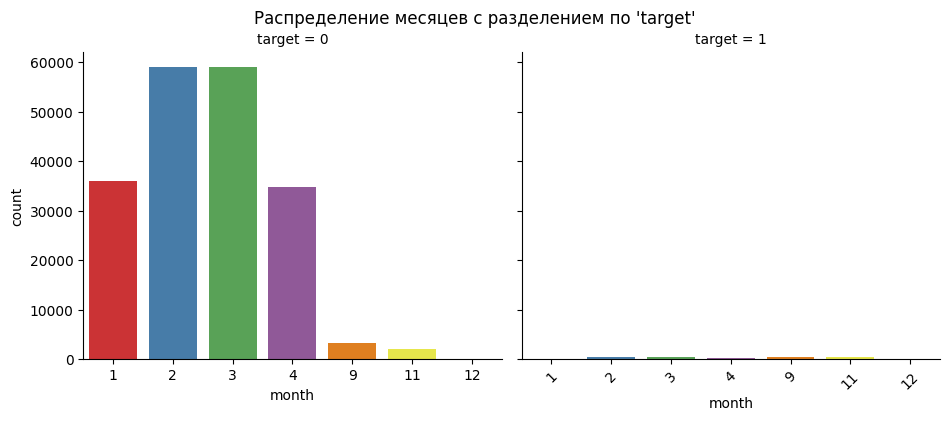

In [6]:
# Используем FacetGrid для разделения графика по значениям "target"
graph = sns.FacetGrid(train_df, col="target", height=4, aspect=1.2)

# Строим countplot для колонки "month" на каждом подграфике
graph.map(sns.countplot, "month", palette="Set1")

# Добавляем заголовок
graph.fig.suptitle("Распределение месяцев с разделением по 'target'", y=1.02)

# Поворачиваем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

# Отображаем график
plt.show()

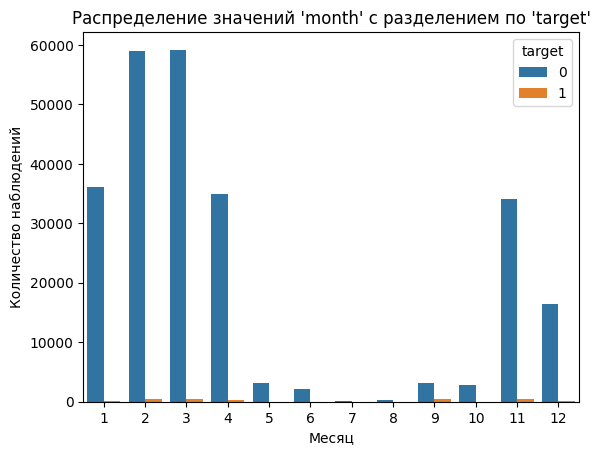

In [8]:
# Строим countplot для колонки "month" с разделением по значению "target"
sns.countplot(x="month", hue="target", data=train_df)

# Добавляем заголовок и метки осей
plt.title("Распределение значений 'month' с разделением по 'target'")
plt.xlabel("Месяц")
plt.ylabel("Количество наблюдений")


# Отображаем график
plt.show()

c:\Users\m2108448\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\m2108448\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


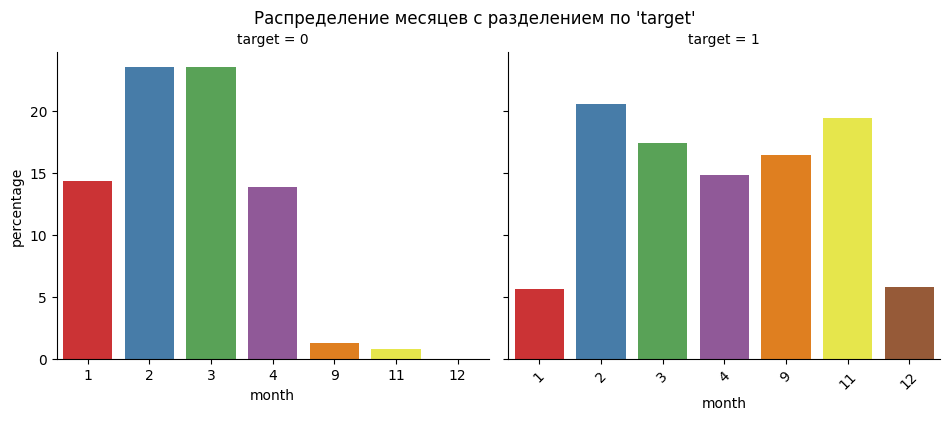

In [10]:
# Вычислим процентное соотношение для каждого месяца, разделенное по значениям 'target'
percentage_df = train_df.groupby(['target', 'month']).size() / train_df.groupby('target').size() * 100
percentage_df = percentage_df.reset_index(name='percentage')

# Построим barplot, используя DataFrame percentage_df
graph = sns.FacetGrid(percentage_df, col="target", height=4, aspect=1.2)
graph.map(sns.barplot, "month", "percentage", palette="Set1")

# Добавим заголовок
graph.fig.suptitle("Распределение месяцев с разделением по 'target'", y=1.02)

# Повернем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

# Покажем график
plt.show()

ПОЛУЧЕН ХОРОШИЙ ГРАФИК!!!!!!!!!!!!!!!!!!!!!!!!!:

c:\Users\m2108448\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\m2108448\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


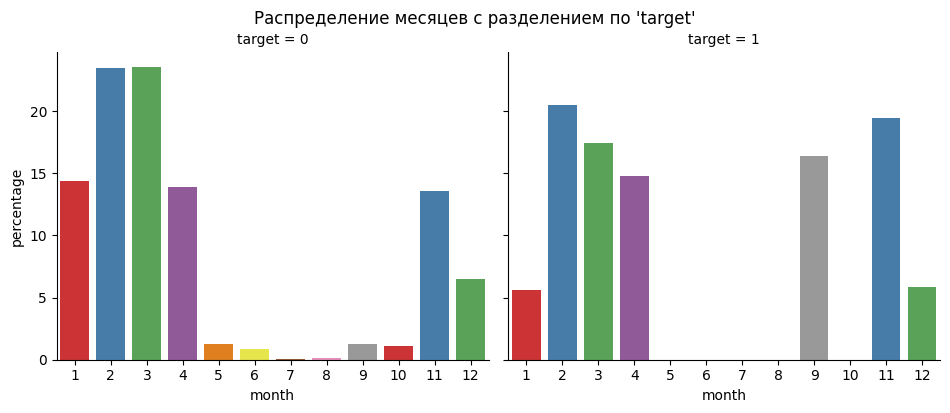

In [41]:
# Вычислим процентное соотношение для каждого месяца, разделенное по значениям 'target'
percentage_df = train_df.groupby(['target', 'month']).size() / train_df.groupby('target').size() * 100
percentage_df = percentage_df.reset_index(name='percentage')

# Создадим DataFrame с полным набором комбинаций месяца и категории "target"
all_months = list(range(1, 13))
all_targets = train_df['target'].unique()
full_index = pd.MultiIndex.from_product([all_targets, all_months], names=['target', 'month'])
full_df = pd.DataFrame(index=full_index).reset_index()

# Объединим существующие процентные значения с полным набором комбинаций
percentage_df = full_df.merge(percentage_df, how='left')

# Заполним пропущенные значения нулями
percentage_df['percentage'].fillna(0, inplace=True)

# Построим barplot
graph = sns.FacetGrid(percentage_df, col="target", height=4, aspect=1.2)
graph.map(sns.barplot, "month", "percentage", palette="Set1")

# Добавим заголовок
graph.fig.suptitle("Распределение месяцев с разделением по 'target'", y=1.02)

# Покажем график
plt.show()

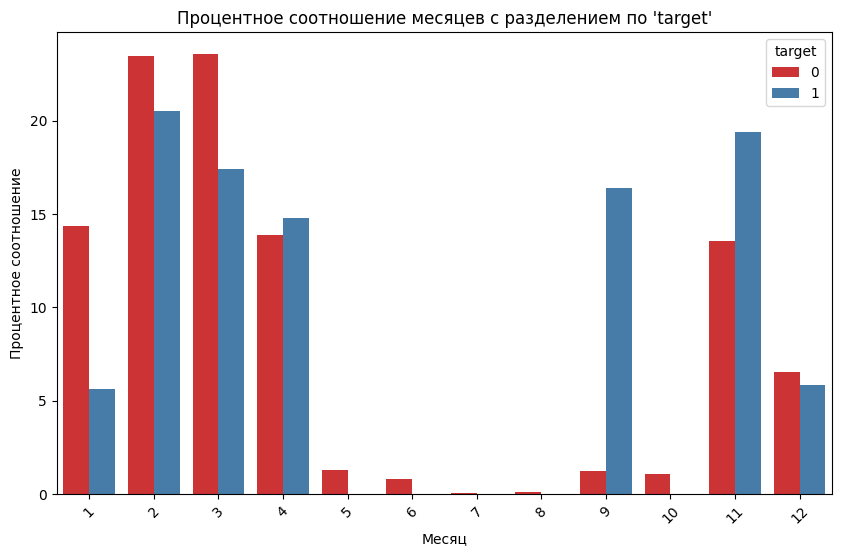

In [30]:
# Вычислим процентное соотношение для каждого месяца, разделенное по значениям 'target'
percentage_df = train_df.groupby(['target', 'month']).size().reset_index(name='count')
total_counts = percentage_df.groupby('target')['count'].sum()
percentage_df['total_count'] = percentage_df['target'].map(total_counts)
percentage_df['percentage'] = (percentage_df['count'] / percentage_df['total_count']) * 100

# Создадим DataFrame с полным набором комбинаций месяца и категории "target"
all_months = list(range(1, 13))
all_targets = train_df['target'].unique()
full_index = pd.MultiIndex.from_product([all_targets, all_months], names=['target', 'month'])
full_df = pd.DataFrame(index=full_index).reset_index()

# Объединим существующие процентные значения с полным набором комбинаций
percentage_df = full_df.merge(percentage_df, how='left')

# Заполним пропущенные значения нулями
percentage_df['percentage'].fillna(0, inplace=True)

# Построим barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='percentage', hue='target', data=percentage_df, palette='Set1')

# Добавим заголовок и метки осей
plt.title("Процентное соотношение месяцев с разделением по 'target'")
plt.xlabel("Месяц")
plt.ylabel("Процентное соотношение")

# Повернем подписи оси x для лучшей читаемости
plt.xticks(rotation=45)

# Покажем график
plt.legend(title='target')
plt.show()